In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from agents.sac_disc import SAC
import matplotlib.pyplot as plt
import gym

In [2]:
env = gym.make('LunarLander-v2')

In [3]:
sac = SAC(
    env=env,
    name='lunar_discrete',
    input_dim=env.observation_space.shape[0],
    log_freq=10,
#     load_mdls=True,
)

In [4]:
sac.run(1000)

collecting experience...
0..

../agents/sac_disc.py:315: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = T(state, device=DEVICE)


10..20..30..40..50..60..70..80..90..100..110..120..130..140..150..160..170..180..190..200..210..

../agents/sac_disc.py:257: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rewards = T(rewards, dtype=torch.float, device=DEVICE)
../agents/sac_disc.py:258: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dones = T(dones, dtype=torch.float, device=DEVICE)
../agents/sac_disc.py:259: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  nxt_states = T(nxt_states, dtype=torch.float, device=DEVICE)
../agents/sac_disc.py:260: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach

Episode: 220, Reward: -113.81686312618265, Avg. Reward: -193.42907050187213, Policy Loss=-27.51
Episode: 230, Reward: -64.57559230876012, Avg. Reward: -174.90008776526918, Policy Loss=-63.37
Episode: 240, Reward: -49.609033082189256, Avg. Reward: -145.32410638877303, Policy Loss=-83.65
Episode: 250, Reward: -23.267488822161283, Avg. Reward: -108.38933083059047, Policy Loss=-90.14
Episode: 260, Reward: 67.85009600853799, Avg. Reward: -66.60082923758138, Policy Loss=-90.07
Episode: 270, Reward: -77.90961045499104, Avg. Reward: -6.023135631923069, Policy Loss=-94.59
Episode: 280, Reward: -2.797171725505133, Avg. Reward: 5.756065132650694, Policy Loss=-93.25
Episode: 290, Reward: -38.0560392273551, Avg. Reward: 1.8094550388385264, Policy Loss=-85.68
Episode: 300, Reward: 8.523113603285767, Avg. Reward: 8.325333434460125, Policy Loss=-80.03
Episode: 310, Reward: 18.9898935780771, Avg. Reward: 7.56821103657321, Policy Loss=-76.9
Episode: 320, Reward: 67.78160208542096, Avg. Reward: 18.164924

KeyboardInterrupt: 

In [5]:
sac.evaluate()

### Traning

Text(0.5, 1.0, 'Average reward per episode')

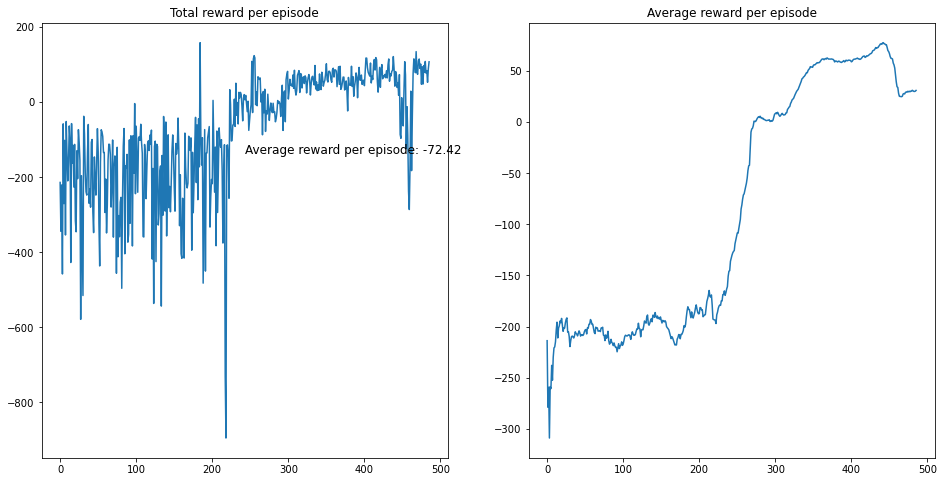

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

total_rewards = [log['reward'] for _, log in sac.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0].plot(range(len(total_rewards)), total_rewards)
ax[0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0].transAxes, size='large')
ax[0].set_title('Total reward per episode')

cumulative_rewards = [log['avg_reward'] for _, log in sac.logs.items()]
ax[1].plot(range(len(total_rewards)), cumulative_rewards)
ax[1].set_title('Average reward per episode')

### Evaluation

Text(0.5, 1.0, 'Average reward per episode')

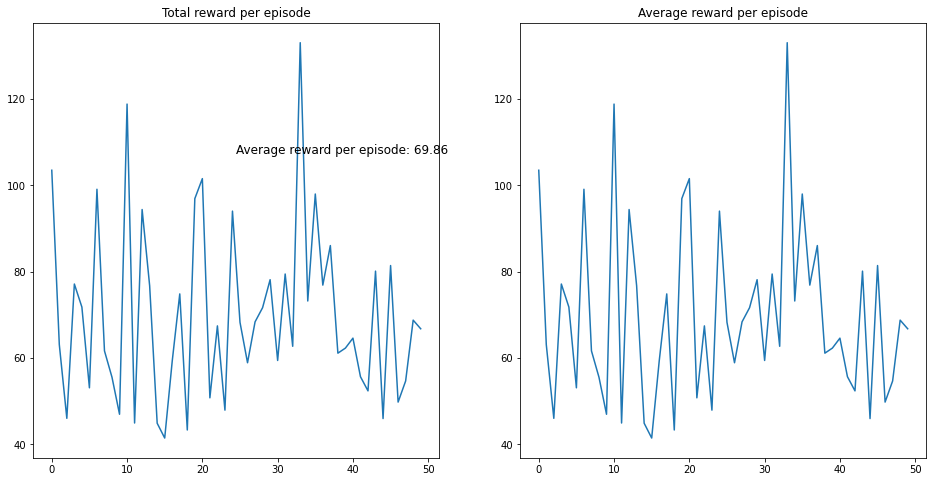

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

total_rewards = [log['reward'] for _, log in sac.eval_logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0].plot(range(len(total_rewards)), total_rewards)
ax[0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0].transAxes, size='large')
ax[0].set_title('Total reward per episode')

cumulative_rewards = [log['reward'] for _, log in sac.eval_logs.items()]
ax[1].plot(range(len(total_rewards)), cumulative_rewards)
ax[1].set_title('Average reward per episode')